<a href="https://colab.research.google.com/github/sammy-suyama/PythonBayesianMLBook/blob/main/chapter5/5_5_%E6%AD%A3%E8%A6%8F%E5%8C%96%E6%B5%81_%E6%9C%80%E5%B0%A4%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title install packages
!pip install watermark
!pip install japanize-matplotlib
# !pip install torch==1.10.0
# !pip install pyro-ppl==1.7.0
!pip install pyro-ppl

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

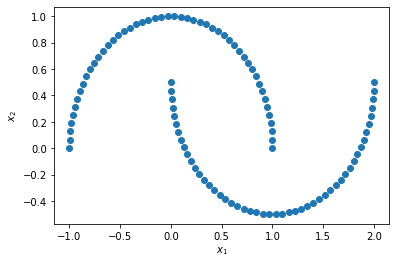

In [ ]:
from sklearn import datasets

n_samples = 100
X, y = datasets.make_moons(n_samples=n_samples, noise=0.0, random_state=1)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

In [ ]:
import torch
import pyro
from pyro import distributions
from pyro.infer import SVI, Trace_ELBO
import pyro.distributions.transforms as T
from pyro.optim import Adam

torch.manual_seed(0) 

In [ ]:
# 変換前のガウス分布
base_dist = distributions.Normal(torch.zeros(2), torch.ones(2))
# 正規化流に使用する関数
transform = T.spline_coupling(2)
# 正規化流によって変換された確率分布
transformed_dist = distributions.TransformedDistribution(base_dist, [transform])

In [ ]:
steps=5000

# データをtensorに変換
dataset = torch.tensor(X, dtype=torch.float)

# 最適化アルゴリズム
optimizer = torch.optim.Adam(transform.parameters(), lr=1e-2)

loss_list = []
for step in range(steps):
    # 勾配を0に設定
    optimizer.zero_grad()
    # 損失関数の計算
    loss = - transformed_dist.log_prob(dataset).mean()
    # 勾配計算
    loss.backward()
    # 勾配降下ステップ
    optimizer.step()
    # 手動でキャッシュをクリア
    transformed_dist.clear_cache()
    #transform.clear_cache()
    
    #loss_list.append(loss)
    loss_list.append(loss.detach().numpy())

    if step % 1000 == 0:
        print('step: {}, loss: {}'.format(step, loss.item()))


step: 0, loss: 3.261087417602539
step: 1000, loss: -0.6031248569488525
step: 2000, loss: -0.8581682443618774
step: 3000, loss: -1.3671473264694214
step: 4000, loss: -1.1476850509643555


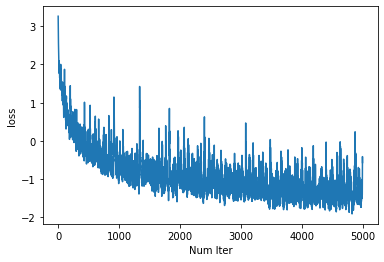

In [ ]:
plt.plot(loss_list)
plt.xlabel('Num Iter')
plt.ylabel('loss');

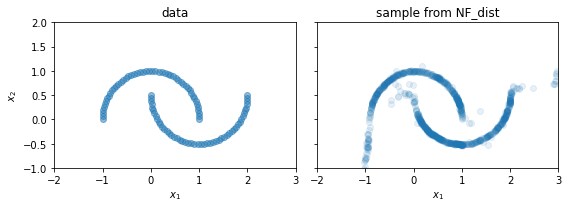

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3), ncols=2, sharex=True, sharey=True)
# 学習データ可視化
ax[0].scatter(X[:,0], X[:,1], label='data', alpha=0.5)
# 正規化流によって変換された確率分布からのサンプル可視化
sample_from_nf_dist = transformed_dist.sample(torch.Size([1000]))
ax[1].scatter(x = sample_from_nf_dist[:,0], y=sample_from_nf_dist[:,1], alpha=0.1)

ax[0].set_xlim(-2,3);ax[0].set_ylim(-1,2)
ax[0].set_title(r'data')
ax[1].set_title(r'sample from NF_dist')
ax[0].set_xlabel(r'$x_1$')
ax[1].set_xlabel(r'$x_1$')
ax[0].set_ylabel(r'$x_2$')
plt.tight_layout();


In [ ]:
%load_ext watermark
%watermark --iversions

sklearn   : 0.0
arviz     : 0.12.1
scipy     : 1.4.1
pandas    : 1.3.5
seaborn   : 0.11.2
torch     : 1.11.0+cu113
pyro      : 1.8.1
numpy     : 1.21.6
IPython   : 5.5.0
matplotlib: 3.2.2

